# SVM - Prevendo caracteres

O algoritmo SVM (Support Vector Machine) é uma técnica de aprendizado supervisionado usada para classificação e regressão. Ele funciona encontrando o hiperplano que melhor separa os dados em diferentes classes, maximizando a margem entre as classes mais próximas ao hiperplano (os vetores de suporte). SVM pode usar diferentes tipos de kernels, como linear, polinomial e radial (RBF), para lidar com dados não linearmente separáveis. Sua capacidade de transformar dados de entrada em espaços de alta dimensão e encontrar a separação ideal faz do SVM uma ferramenta poderosa para tarefas complexas de classificação e análise preditiva.


**Objetivo:** Seu modelo deve prever o caracter a partir do dataset fornecido

>**Referências:** Formação Cientista de Dados (https://www.datascienceacademy.com.br/)

In [ ]:
# Configurações de saída
options(scipen = 999, digits = 2, repos = 'http://cran.rstudio.com/', repr.plot.width = 20, repr.plot.height =10)

: 

In [ ]:
# Carregar os pacotes necessários
if(!require(pacman)) install.packages('pacman')
library('pacman')
pacman::p_load(dplyr, ggplot, caret, corrplot, kernlab,pROC)

: 

In [3]:
# Carregando e exibindo o conjunto de dados
df <- read.csv('/content/letterdata.csv')
head(df)

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
2,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
3,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
4,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
5,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
6,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7


In [4]:
# Analisar os tipos de dados
str(df)

'data.frame':	20000 obs. of  17 variables:
 $ letter: chr  "T" "I" "D" "N" ...
 $ xbox  : int  2 5 4 7 2 4 4 1 2 11 ...
 $ ybox  : int  8 12 11 11 1 11 2 1 2 15 ...
 $ width : int  3 3 6 6 3 5 5 3 4 13 ...
 $ height: int  5 7 8 6 1 8 4 2 4 9 ...
 $ onpix : int  1 2 6 3 1 3 4 1 2 7 ...
 $ xbar  : int  8 10 10 5 8 8 8 8 10 13 ...
 $ ybar  : int  13 5 6 9 6 8 7 2 6 2 ...
 $ x2bar : int  0 5 2 4 6 6 6 2 2 6 ...
 $ y2bar : int  6 4 6 6 6 9 6 2 6 2 ...
 $ xybar : int  6 13 10 4 6 5 7 8 12 12 ...
 $ x2ybar: int  10 3 3 4 5 6 6 2 4 1 ...
 $ xy2bar: int  8 9 7 10 9 6 6 8 8 9 ...
 $ xedge : int  0 2 3 6 1 0 2 1 1 8 ...
 $ xedgey: int  8 8 7 10 7 8 8 6 6 1 ...
 $ yedge : int  0 4 3 2 5 9 7 2 1 1 ...
 $ yedgex: int  8 10 9 8 10 7 10 7 7 8 ...


In [5]:
# Analisar o sumário dos dados
summary(df)

    letter               xbox         ybox        width          height    
 Length:20000       Min.   : 0   Min.   : 0   Min.   : 0.0   Min.   : 0.0  
 Class :character   1st Qu.: 3   1st Qu.: 5   1st Qu.: 4.0   1st Qu.: 4.0  
 Mode  :character   Median : 4   Median : 7   Median : 5.0   Median : 6.0  
                    Mean   : 4   Mean   : 7   Mean   : 5.1   Mean   : 5.4  
                    3rd Qu.: 5   3rd Qu.: 9   3rd Qu.: 6.0   3rd Qu.: 7.0  
                    Max.   :15   Max.   :15   Max.   :15.0   Max.   :15.0  
     onpix           xbar           ybar          x2bar          y2bar     
 Min.   : 0.0   Min.   : 0.0   Min.   : 0.0   Min.   : 0.0   Min.   : 0.0  
 1st Qu.: 2.0   1st Qu.: 6.0   1st Qu.: 6.0   1st Qu.: 3.0   1st Qu.: 4.0  
 Median : 3.0   Median : 7.0   Median : 7.0   Median : 4.0   Median : 5.0  
 Mean   : 3.5   Mean   : 6.9   Mean   : 7.5   Mean   : 4.6   Mean   : 5.2  
 3rd Qu.: 5.0   3rd Qu.: 8.0   3rd Qu.: 9.0   3rd Qu.: 6.0   3rd Qu.: 7.0  
 Max.   :15.

In [11]:
# Verificando se há valores ausentes
sum(is.na(df))

[1] 0

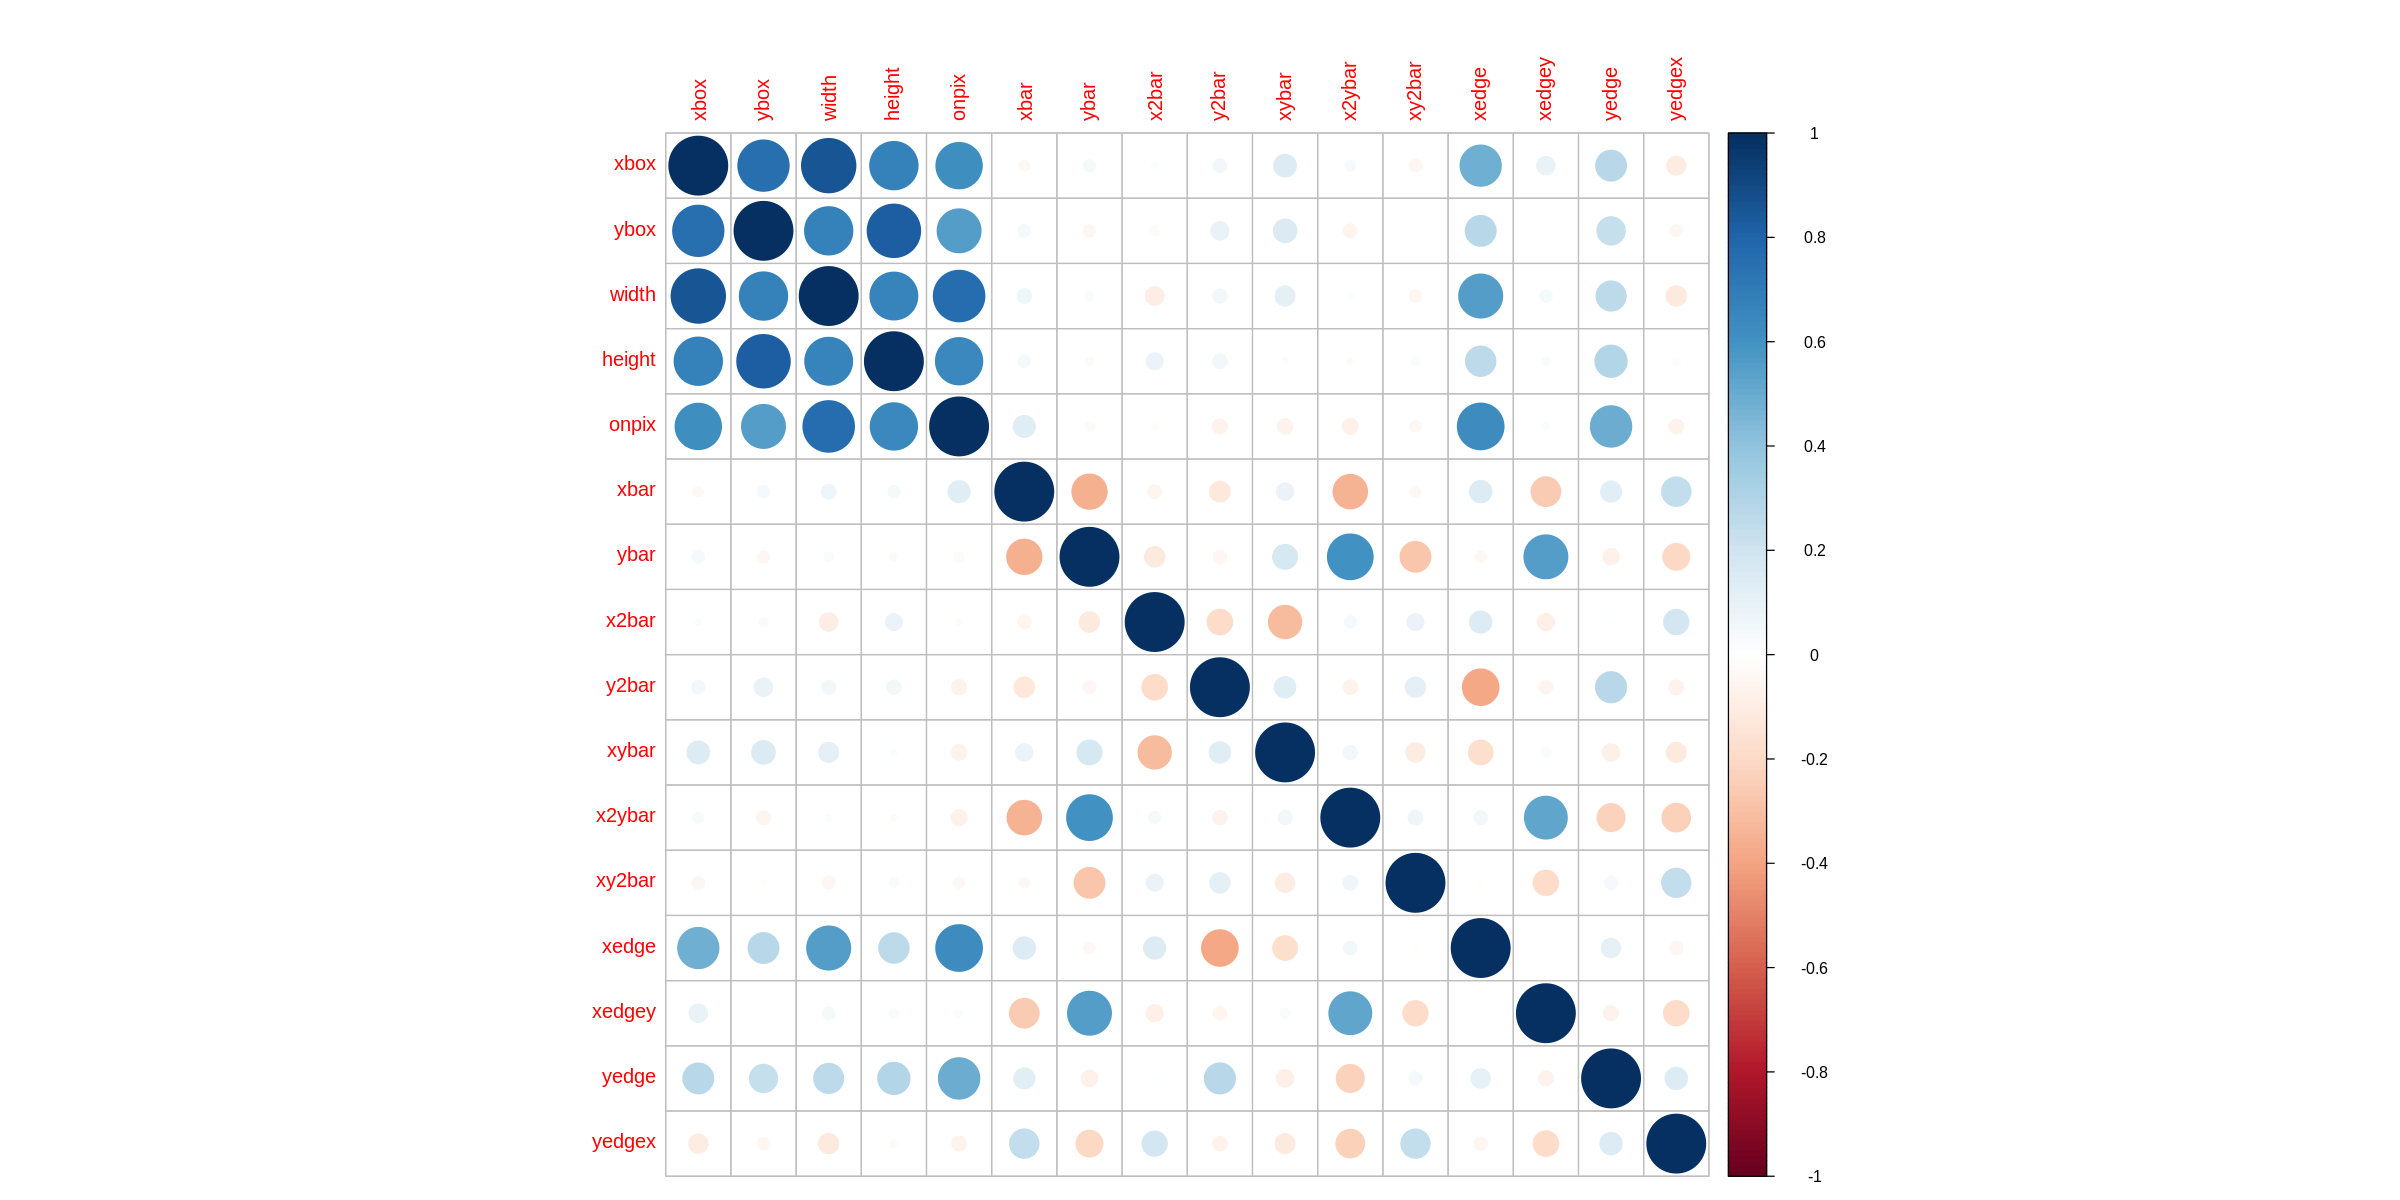

In [8]:
# Analisando as correções entre as variáveis explicativas
corrplot(cor(df[2:17]))

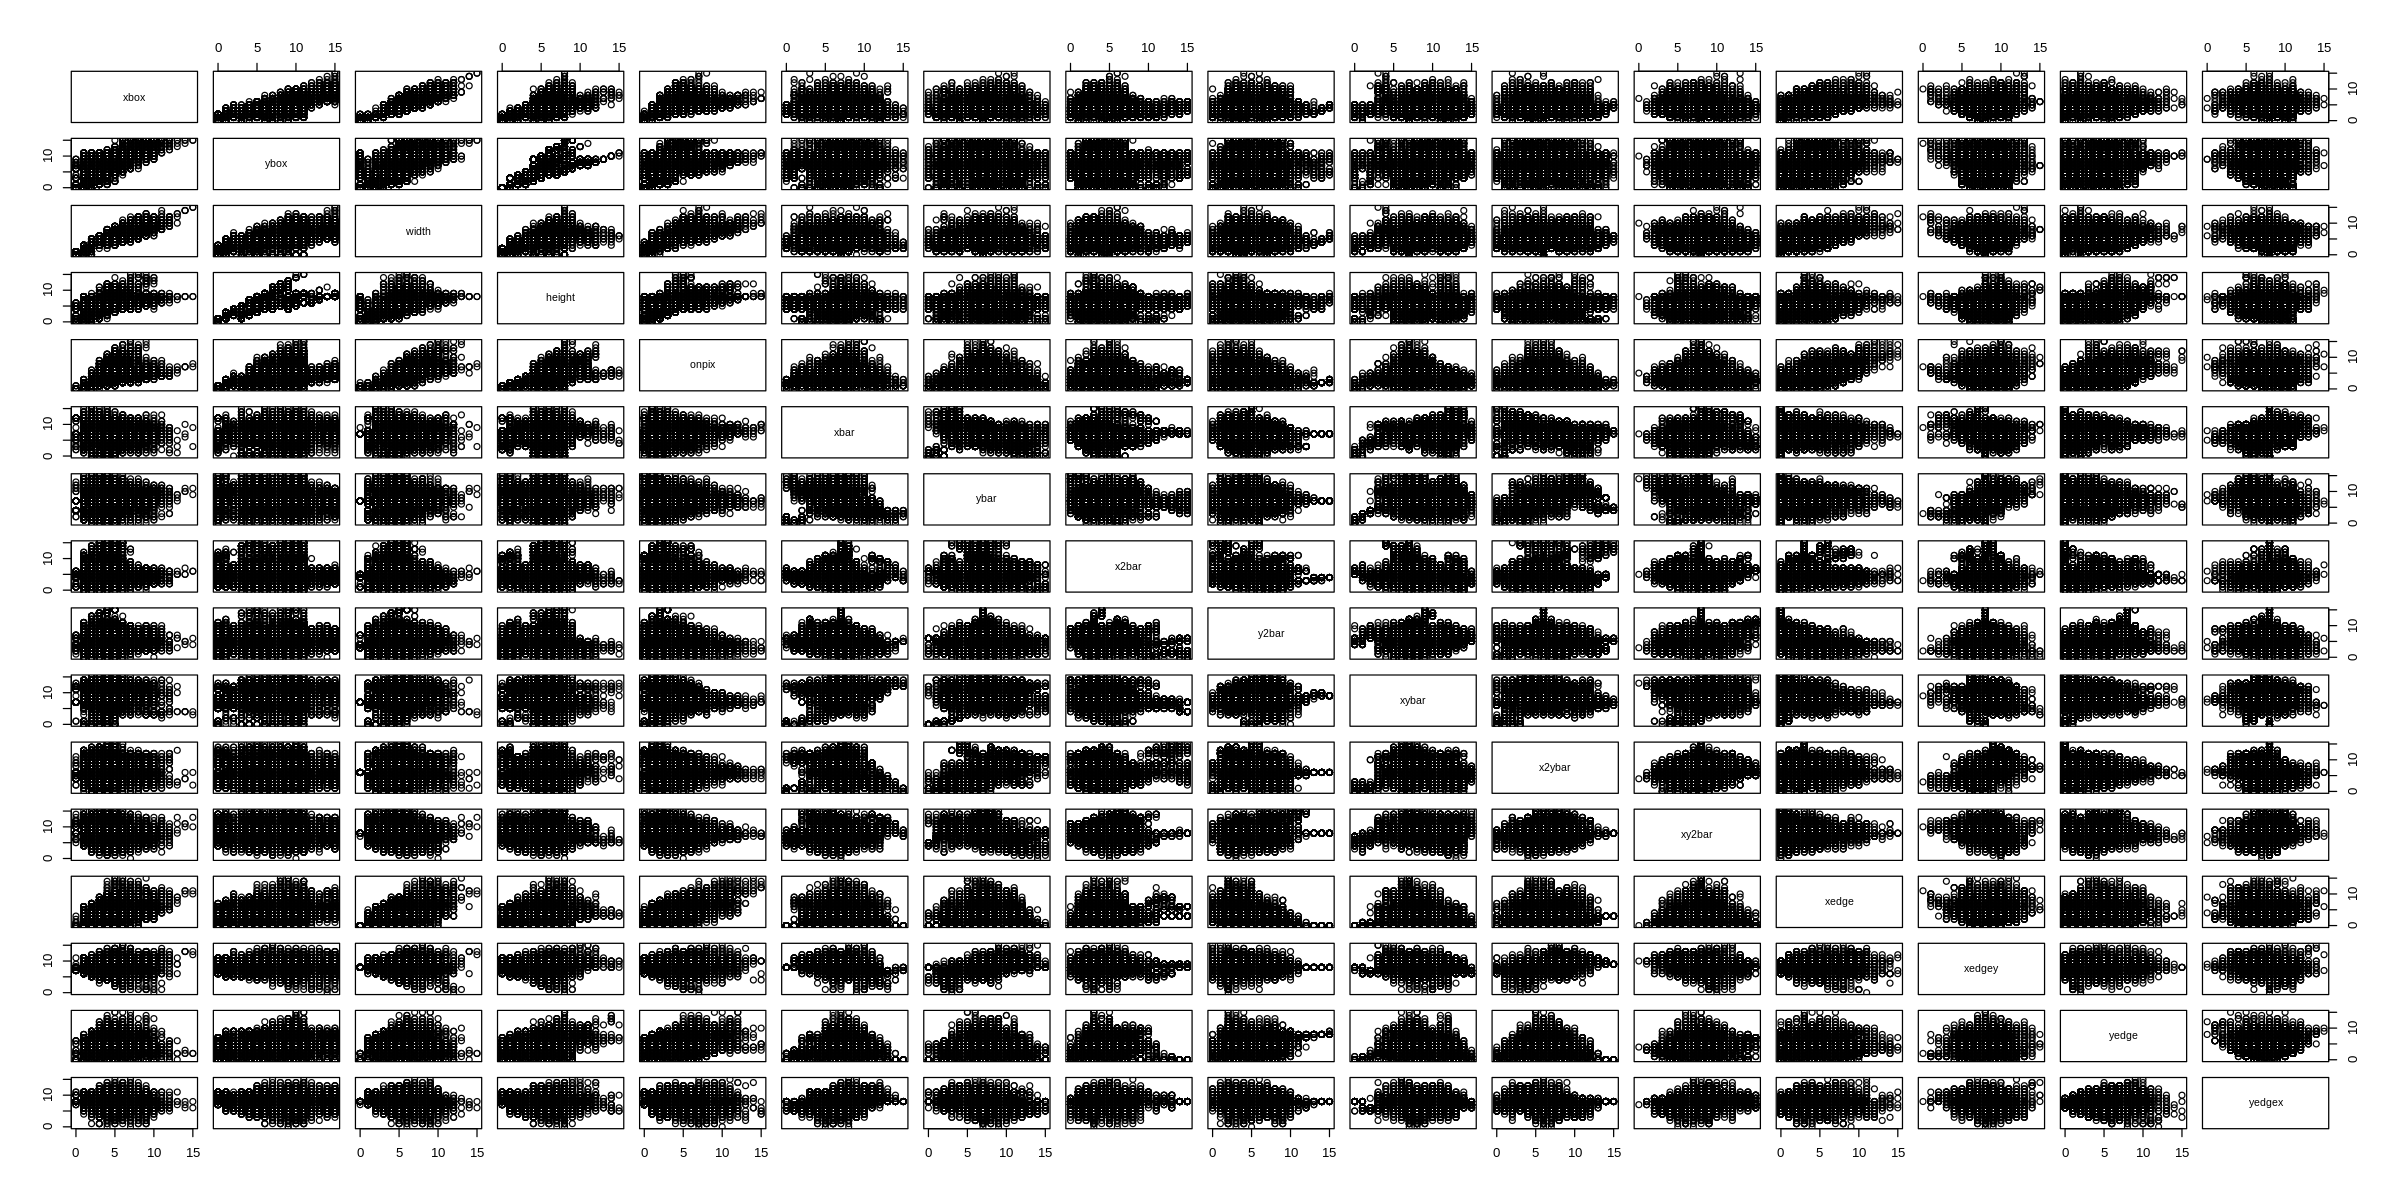

In [15]:
# Verificando os scatterplots de correlações
pairs(df[2:17])

In [9]:
# Divisão do conjunto de dados
indice <- caret::createDataPartition(df$letter, p=0.7, list = FALSE)
treino <- df[indice,]
teste <- df[-indice,]

In [10]:
# Verificando as dimensões dos conjuntos de dados
dim(treino)
dim(teste)

[1] 14015    17

[1] 5985   17

In [17]:
# Criar o modelo SVM com validação cruzada de 5 folds
trControl <- caret::trainControl(method = 'cv', number = 5)
modelo_v1 <- caret::train(letter ~ ., data = treino, method = "svmLinear", trControl = trControl)

In [18]:
print(modelo_v1)

Support Vector Machines with Linear Kernel 

14015 samples
   16 predictor
   26 classes: 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 11214, 11211, 11211, 11214, 11210 
Resampling results:

  Accuracy  Kappa
  0.85      0.85 

Tuning parameter 'C' was held constant at a value of 1


In [19]:
# Realizando as previsões com o conjunto de teste
previsao <- predict(modelo_v1, newdata = teste)
head(previsao)

[1] T D A J M G
Levels: A B C D E F G H I J K L M N O P Q R S T U V W X Y Z

In [20]:
# Verificando a matriz confusão
table(previsao, teste$letter)

        
previsao   A   B   C   D   E   F   G   H   I   J   K   L   M   N   O   P   Q
       A 224   2   0   3   0   0   1   1   1   6   0   0   3   0   5   0   5
       B   0 197   0   8   2   2   0   3   2   0   2   0   0   0   0   0   2
       C   0   0 186   0   3   0   9   7   0   0   2   1   0   0   7   0   0
       D   0   1   0 206   0   2   6  13   1   0   1   3   0   6   5   3   3
       E   0   2  11   0 185   2   0   0   0   0   1   3   0   0   0   1   8
       F   0   1   1   0   2 199   2   6   4   3   0   0   0   0   0  22   0
       G   1   2   4   0  12   1 186   3   0   0   1   4   0   0   0   4   7
       H   0   4   0   4   0   1   1 152   0   0   2   5   5   6  21   0   0
       I   0   0   0   2   0   2   0   1 206  10   0   0   0   0   0   0   0
       J   2   1   0   0   0   3   0   1   8 197   0   0   0   0   1   0   0
       K   1   0  13   1   2   1   6   3   0   0 186   0   0   3   0   2   1
       L   0   0   2   0   5   0   1   0   1   0   1 201   0   0   

In [23]:
# Taxa de acertos e erros
acertos <- previsao == teste$letter
table(acertos)
prop.table(table(acertos))

acertos
FALSE  TRUE 
  926  5059 

acertos
FALSE  TRUE 
 0.15  0.85 

In [24]:
# Criar o modelo SVM com validação cruzada de 5 folds
trControl <- caret::trainControl(method = 'cv', number = 5)
modelo_v2 <- caret::train(letter ~ ., data = treino, method = "svmRadial", trControl = trControl)

In [27]:
print(modelo_v2)

Support Vector Machines with Radial Basis Function Kernel 

14015 samples
   16 predictor
   26 classes: 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 11213, 11212, 11211, 11210, 11214 
Resampling results across tuning parameters:

  C     Accuracy  Kappa
  0.25  0.86      0.86 
  0.50  0.90      0.90 
  1.00  0.93      0.92 

Tuning parameter 'sigma' was held constant at a value of 0.048
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.048 and C = 1.


In [25]:
# Realizando as previsões com o conjunto de teste
previsao_v2 <- predict(modelo_v2, newdata = teste)
head(previsao_v2)

[1] T D A J M G
Levels: A B C D E F G H I J K L M N O P Q R S T U V W X Y Z

In [26]:
# Taxa de acertos e erros
acertos_v2 <- previsao_v2 == teste$letter
table(acertos_v2)
prop.table(table(acertos_v2))

acertos_v2
FALSE  TRUE 
  429  5556 

acertos_v2
FALSE  TRUE 
0.072 0.928 

In [28]:
# Criar o modelo SVM com validação cruzada de 5 folds
trControl <- caret::trainControl(method = 'cv', number = 5)
modelo_v3 <- caret::train(letter ~ ., data = treino, method = "svmRadialSigma", trControl = trControl)
print(modelo_v3)

Support Vector Machines with Radial Basis Function Kernel 

14015 samples
   16 predictor
   26 classes: 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 11211, 11215, 11213, 11208, 11213 
Resampling results across tuning parameters:

  sigma  C     Accuracy  Kappa
  0.018  0.25  0.80      0.79 
  0.018  0.50  0.84      0.83 
  0.018  1.00  0.87      0.87 
  0.048  0.25  0.86      0.86 
  0.048  0.50  0.90      0.89 
  0.048  1.00  0.92      0.92 
  0.078  0.25  0.89      0.89 
  0.078  0.50  0.92      0.92 
  0.078  1.00  0.94      0.94 

Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.078 and C = 1.


In [29]:
# Realizando as previsões com o conjunto de teste
previsao_v3 <- predict(modelo_v3, newdata = teste)
head(previsao_v3)

[1] T D A J M G
Levels: A B C D E F G H I J K L M N O P Q R S T U V W X Y Z

In [30]:
# Taxa de acertos e erros
acertos_v3 <- previsao_v3 == teste$letter
table(acertos_v3)
prop.table(table(acertos_v3))

acertos_v3
FALSE  TRUE 
  296  5689 

acertos_v3
FALSE  TRUE 
0.049 0.951 

Escolhido o modelo_v3 devido a taxa de acertos de 95,10% dos casos.